In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


%matplotlib inline

In [2]:
dataset = pd.read_csv('Crop_recommendation.csv')

In [3]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
dataset.shape

(2200, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
print(dataset['label'].unique())
len(dataset['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


22

In [7]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

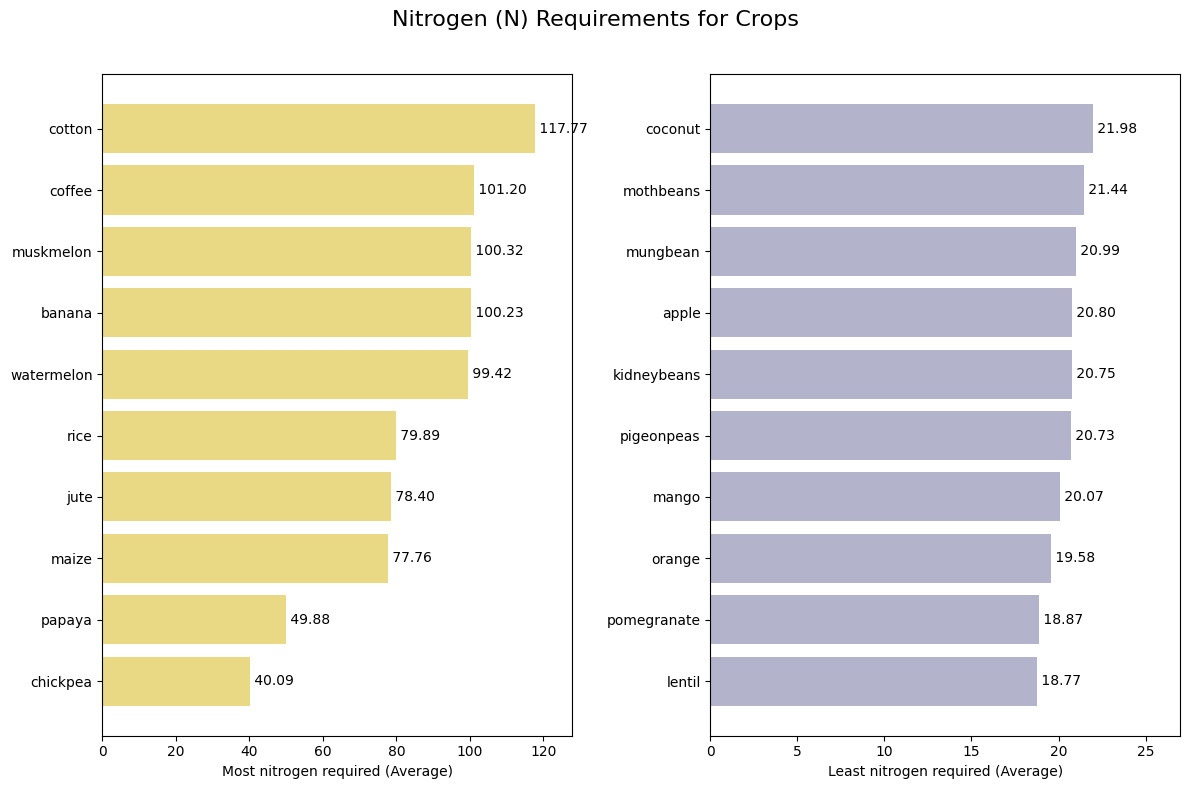

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dataset' is your DataFrame
# Calculate the average nitrogen (N) required by each crop
avg_nitrogen = dataset.groupby('label')['N'].mean().sort_values(ascending=False)

# Get the top 10 crops that require the most and least nitrogen
crops_most = avg_nitrogen.head(10).index.tolist()
n_most = avg_nitrogen.head(10).values.tolist()

crops_least = avg_nitrogen.tail(10).index.tolist()
n_least = avg_nitrogen.tail(10).values.tolist()

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Nitrogen (N) Requirements for Crops', fontsize=16)

# Plot for crops requiring most nitrogen
y_pos = np.arange(len(crops_most))
ax1.barh(y_pos, n_most, align='center', color='#e9d985')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(crops_most)
ax1.invert_yaxis()
ax1.set_xlabel('Most nitrogen required (Average)')
ax1.set_xlim(0, max(n_most) + 10)

# Plot for crops requiring least nitrogen
y_pos = np.arange(len(crops_least))
ax2.barh(y_pos, n_least, align='center', color='#b3b3cb')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(crops_least)
ax2.invert_yaxis()
ax2.set_xlabel('Least nitrogen required (Average)')
ax2.set_xlim(0, max(n_least) + 5)

# Add values to the end of each bar
for i, v in enumerate(n_most):
    ax1.text(v, i, f' {v:.2f}', va='center')

for i, v in enumerate(n_least):
    ax2.text(v, i, f' {v:.2f}', va='center')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


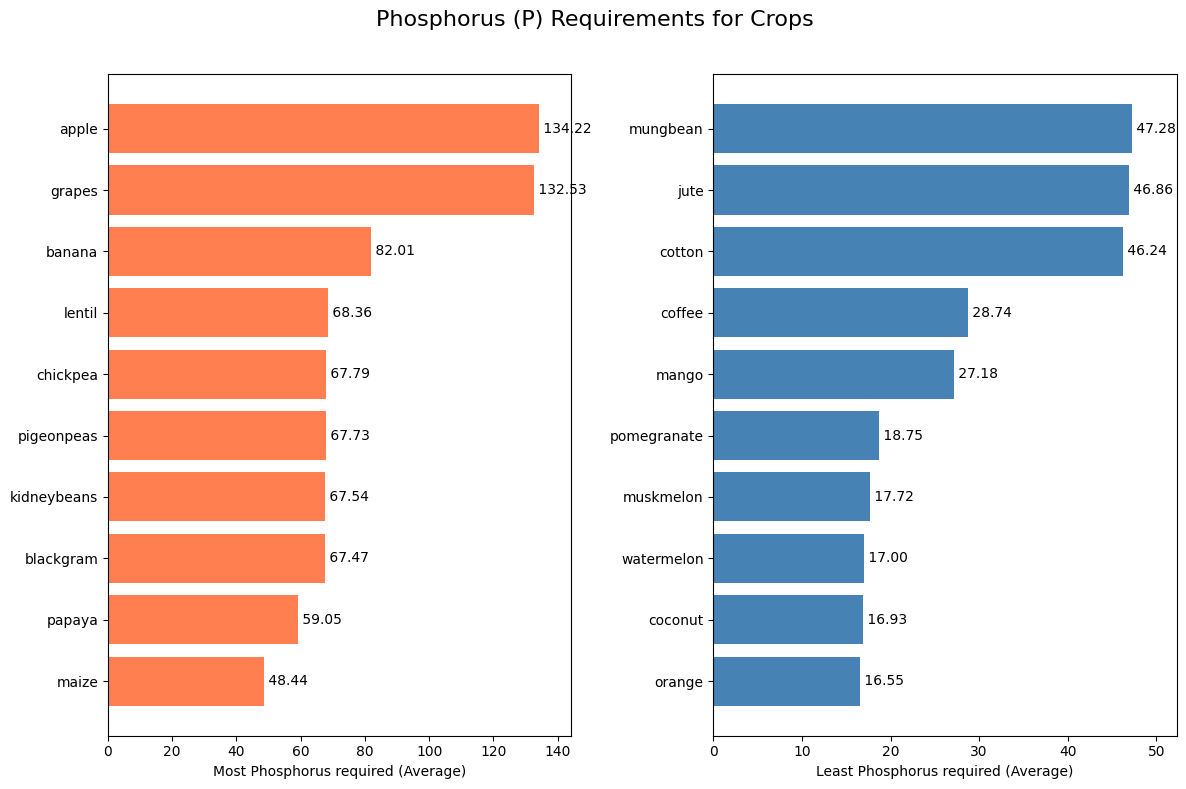

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dataset' is your DataFrame
# Calculate the average phosphorus (P) required by each crop
avg_phosphorus = dataset.groupby('label')['P'].mean().sort_values(ascending=False)

# Get the top 10 crops that require the most and least phosphorus
crops_most = avg_phosphorus.head(10).index.tolist()
p_most = avg_phosphorus.head(10).values.tolist()

crops_least = avg_phosphorus.tail(10).index.tolist()
p_least = avg_phosphorus.tail(10).values.tolist()

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Phosphorus (P) Requirements for Crops', fontsize=16)

# Plot for crops requiring most phosphorus
y_pos = np.arange(len(crops_most))
ax1.barh(y_pos, p_most, align='center', color='#FF7F50')  # Coral color for most phosphorus
ax1.set_yticks(y_pos)
ax1.set_yticklabels(crops_most)
ax1.invert_yaxis()
ax1.set_xlabel('Most Phosphorus required (Average)')
ax1.set_xlim(0, max(p_most) + 10)

# Plot for crops requiring least phosphorus
y_pos = np.arange(len(crops_least))
ax2.barh(y_pos, p_least, align='center', color='#4682B4')  # Steel Blue color for least phosphorus
ax2.set_yticks(y_pos)
ax2.set_yticklabels(crops_least)
ax2.invert_yaxis()
ax2.set_xlabel('Least Phosphorus required (Average)')
ax2.set_xlim(0, max(p_least) + 5)

# Add values to the end of each bar
for i, v in enumerate(p_most):
    ax1.text(v, i, f' {v:.2f}', va='center')

for i, v in enumerate(p_least):
    ax2.text(v, i, f' {v:.2f}', va='center')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


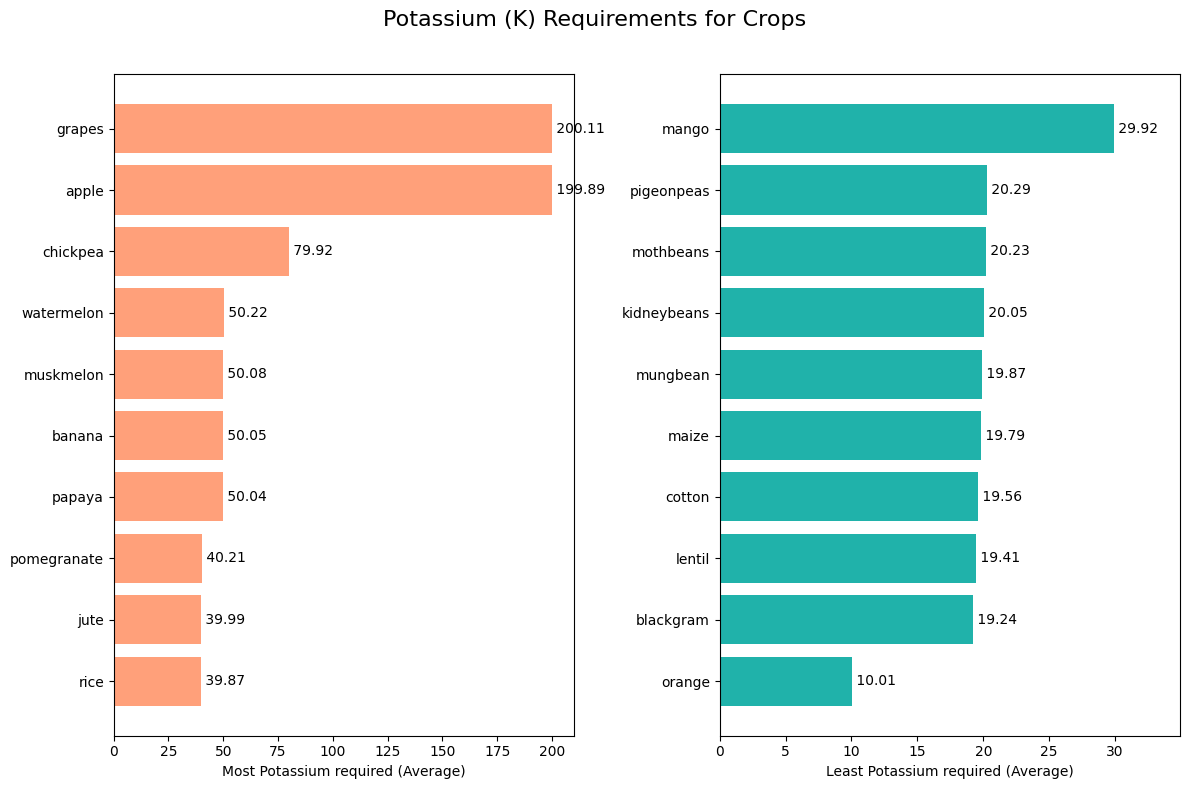

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dataset' is your DataFrame
# Calculate the average potassium (K) required by each crop
avg_potassium = dataset.groupby('label')['K'].mean().sort_values(ascending=False)

# Get the top 10 crops that require the most and least potassium
crops_most = avg_potassium.head(10).index.tolist()
k_most = avg_potassium.head(10).values.tolist()

crops_least = avg_potassium.tail(10).index.tolist()
k_least = avg_potassium.tail(10).values.tolist()

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Potassium (K) Requirements for Crops', fontsize=16)

# Plot for crops requiring most potassium
y_pos = np.arange(len(crops_most))
ax1.barh(y_pos, k_most, align='center', color='#FFA07A')  # Light Salmon color for most potassium
ax1.set_yticks(y_pos)
ax1.set_yticklabels(crops_most)
ax1.invert_yaxis()
ax1.set_xlabel('Most Potassium required (Average)')
ax1.set_xlim(0, max(k_most) + 10)

# Plot for crops requiring least potassium
y_pos = np.arange(len(crops_least))
ax2.barh(y_pos, k_least, align='center', color='#20B2AA')  # Light Sea Green color for least potassium
ax2.set_yticks(y_pos)
ax2.set_yticklabels(crops_least)
ax2.invert_yaxis()
ax2.set_xlabel('Least Potassium required (Average)')
ax2.set_xlim(0, max(k_least) + 5)

# Add values to the end of each bar
for i, v in enumerate(k_most):
    ax1.text(v, i, f' {v:.2f}', va='center')

for i, v in enumerate(k_least):
    ax2.text(v, i, f' {v:.2f}', va='center')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [12]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'dataset' is your DataFrame
# Calculate the average N, P, and K required by each crop
crop_summary = dataset.groupby('label').agg({'N': 'mean', 'P': 'mean', 'K': 'mean'})

# Initialize the figure
fig = go.Figure()

# Add bar trace for Nitrogen
fig.add_trace(go.Bar(
    x=crop_summary.index,  # Crop names
    y=crop_summary['N'],   # Nitrogen values
    name='Nitrogen',
    marker_color='indianred'
))

# Add bar trace for Phosphorus
fig.add_trace(go.Bar(
    x=crop_summary.index,  # Crop names
    y=crop_summary['P'],   # Phosphorus values
    name='Phosphorous',
    marker_color='lightsalmon'
))

# Add bar trace for Potassium
fig.add_trace(go.Bar(
    x=crop_summary.index,  # Crop names
    y=crop_summary['K'],   # Potassium values
    name='Potash',
    marker_color='crimson'
))

# Update layout with title, background color, and bar mode
fig.update_layout(
    title="N, P, K Values Comparison Between Crops",
    plot_bgcolor='white',  # Set background color of the plot
    barmode='group',       # Group bars by crop
    xaxis_tickangle=-45    # Rotate x-axis labels for better fit
)

# Show the plot
fig.show()


In [13]:
# Create a subplot figure with 1 row and 5 columns for pie charts
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

# Define labels for the pie charts
labels = ['Nitrogen (N)', 'Phosphorus (P)', 'Potash (K)']

# Function to add a pie chart for a specific crop
def add_pie_chart(crop_name, row, col):
    crop_npk = crop_summary[crop_summary.index == crop_name]
    values = [crop_npk['N'].values[0], crop_npk['P'].values[0], crop_npk['K'].values[0]]
    fig.add_trace(go.Pie(labels=labels, values=values, name=crop_name, hole=.4, hoverinfo="label+percent+name"), row, col)

# Add pie charts for each crop
add_pie_chart('rice', 1, 1)
add_pie_chart('cotton', 1, 2)
add_pie_chart('jute', 1, 3)
add_pie_chart('maize', 1, 4)
add_pie_chart('lentil', 1, 5)

# Update layout with title and annotations
fig.update_layout(
    title_text="NPK Ratio for Rice, Cotton, Jute, Maize, Lentil",
    annotations=[
        dict(text='Rice', x=0.06, y=0.8, font_size=15, showarrow=False),
        dict(text='Cotton', x=0.26, y=0.8, font_size=15, showarrow=False),
        dict(text='Jute', x=0.50, y=0.8, font_size=15, showarrow=False),
        dict(text='Maize', x=0.74, y=0.8, font_size=15, showarrow=False),
        dict(text='Lentil', x=0.94, y=0.8, font_size=15, showarrow=False)
    ]
)

# Show the plot
fig.show()


In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define labels and colors
labels = ['Nitrogen (N)', 'Phosphorus (P)', 'Potash (K)']
cafe_colors = ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

# Create a subplot figure with 2 rows and 5 columns for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)

# Function to add a pie chart for a specific crop
def add_pie_chart(crop_name, row, col):
    crop_npk = crop_summary[crop_summary.index == crop_name]
    values = [crop_npk['N'].values[0], crop_npk['P'].values[0], crop_npk['K'].values[0]]
    fig.add_trace(go.Pie(labels=labels, values=values, name=crop_name, hole=.4, hoverinfo="label+percent+name", 
                         marker=dict(colors=cafe_colors)), row, col)

# Add pie charts for each fruit
add_pie_chart('apple', 1, 1)
add_pie_chart('banana', 1, 2)
add_pie_chart('grapes', 1, 3)
add_pie_chart('orange', 1, 4)
add_pie_chart('mango', 1, 5)
add_pie_chart('coconut', 2, 1)
add_pie_chart('papaya', 2, 2)
add_pie_chart('pomegranate', 2, 3)
add_pie_chart('watermelon', 2, 4)
add_pie_chart('muskmelon', 2, 5)

# Update layout with title and annotations
fig.update_layout(
    title_text="NPK Ratio for Fruits",
    annotations=[
        dict(text='Apple', x=0.06, y=1.08, font_size=15, showarrow=False),
        dict(text='Banana', x=0.26, y=1.08, font_size=15, showarrow=False),
        dict(text='Grapes', x=0.50, y=1.08, font_size=15, showarrow=False),
        dict(text='Orange', x=0.74, y=1.08, font_size=15, showarrow=False),
        dict(text='Mango', x=0.94, y=1.08, font_size=15, showarrow=False),
        dict(text='Coconut', x=0.06, y=0.46, font_size=15, showarrow=False),
        dict(text='Papaya', x=0.26, y=0.46, font_size=15, showarrow=False),
        dict(text='Pomegranate', x=0.50, y=0.46, font_size=15, showarrow=False),
        dict(text='Watermelon', x=0.74, y=0.46, font_size=15, showarrow=False),
        dict(text='Muskmelon', x=0.94, y=0.46, font_size=15, showarrow=False)
    ]
)

# Show the plot
fig.show()


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset['label']= labelencoder_y.fit_transform(dataset['label'])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [17]:
y_train

array([ 0,  8,  8, ...,  2, 10, 16])

### Decision Tree ###

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
y_pred_dtc=dtc.predict(x_test)
y_pred_dtc

array([21, 21,  7,  3,  2, 20, 13,  9, 15,  1, 13,  5, 10, 14, 12,  0,  5,
       10, 11, 12,  4,  2,  9,  8,  6,  5, 10, 16, 13,  9, 19, 20, 11, 15,
        4,  6, 12, 12, 21, 13, 11,  2, 18, 21, 18, 14,  9,  9,  6, 14, 13,
        2,  0, 15, 18,  1, 17, 12, 10,  6, 16, 14, 21, 20, 15,  0,  7,  5,
        0, 16,  4, 19,  9, 11,  7, 13,  3, 11,  8, 12, 20, 13, 21, 21, 15,
        6, 11, 10, 13, 17,  2,  8, 14,  7, 14, 11,  5,  8, 10,  3, 16,  8,
       14,  1,  1, 20, 21,  5, 18, 15, 15, 12,  5,  7, 16, 19, 14, 10, 11,
        8, 19, 10, 16,  3,  3,  2, 19, 16,  3, 17, 13, 11, 15, 14, 11, 14,
        4, 19, 16,  2,  2,  7,  0,  5,  3,  0,  8, 12, 21, 17, 16,  4, 13,
        1, 19,  3, 21,  2,  0,  8, 10, 18,  8,  9,  9, 15, 20, 15,  1, 16,
       18,  0, 13,  4,  6, 14,  9, 19, 17, 16, 20, 17, 17, 18,  9,  1,  4,
       18, 20, 17, 11,  8, 13, 20, 11,  5, 18,  4,  3, 12,  4, 19, 11, 13,
       13, 16, 15, 11, 18,  1,  3,  2, 18, 16, 13, 14, 12, 17, 15, 19, 20,
       20,  2, 17,  2,  5

In [20]:
from sklearn import metrics
print('Accuracy : ',metrics.accuracy_score(y_pred_dtc,y_test))

Accuracy :  0.990909090909091


In [21]:
sampled_dataset = dataset.sample(n=500, random_state=0)

org_label = sampled_dataset['label'].values


sampled_dataset=sampled_dataset.drop(columns=['label'])
sampled_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514


In [22]:
pred_labels=dtc.predict(sampled_dataset)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [23]:
from sklearn import metrics
print('Accuracy : ',metrics.accuracy_score(pred_labels,org_label))

Accuracy :  0.992


In [24]:
c = 0
for i in range(len(pred_labels)):
    if pred_labels[i] == org_label[i]:
        c += 1
print(f'Number of matching records: {c}')
print('Accuracy : ',496/500)

Number of matching records: 496
Accuracy :  0.992


### Random Forest ###

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', random_state=0)

# Fit the model on the training data
rfc.fit(x_train, y_train)

# Predict the test set results
y_pred_rfc = rfc.predict(x_test)

# Print the accuracy of the predictions
print('Accuracy:', metrics.accuracy_score(y_pred_rfc, y_test))

# Predict labels for the sampled dataset
pred_labels_rfc = rfc.predict(sampled_dataset)

# Print the accuracy of the predictions of the sampled data compared to the original labels
print('Accuracy:', metrics.accuracy_score(pred_labels_rfc, org_label))

Accuracy: 0.9954545454545455
Accuracy: 0.996


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [25]:
def get_user_input():
    user_data = {}
    
    user_data['N'] = float(input("Enter Nitrogen level (N): "))
    user_data['P'] = float(input("Enter Phosphorus level (P): "))
    user_data['K'] = float(input("Enter Potassium level (K): "))
    user_data['temperature'] = float(input("Enter Temperature: "))
    user_data['humidity'] = float(input("Enter Humidity: "))
    user_data['ph'] = float(input("Enter pH level: "))
    user_data['rainfall'] = float(input("Enter Rainfall: "))
    
    return pd.DataFrame([user_data])

# Take user input for new data
new_data = get_user_input()

# Make predictions for the new data
new_data_prediction = dtc.predict(new_data)

predicted_crop = labelencoder_y.inverse_transform([new_data_prediction[0]])

print(f"Recommended crop: {predicted_crop[0]}")

Recommended crop: jute


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [26]:
import joblib
joblib.dump(dtc, 'crop_model.pkl')
joblib.dump(rfc, 'model_rfc.pkl')
joblib.dump(labelencoder_y, 'label_encoder.pkl')


['label_encoder.pkl']